In [281]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)


from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve

In [282]:
# Loading the data after the transformations

In [283]:
data = pd.read_csv("data/processed/train.csv")


In [284]:
# data before the transformations

In [285]:
data_eda = pd.read_csv("data/processed/train_eda.csv")

In [286]:
data.head(5)

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Age at enrollment,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Gender_1,Debtor_1,Scholarship holder_1,Tuition fees up to date_1,Application mode_1,...,Application mode_18,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Target
0,0.633983,0.575931,-0.307427,0.990526,0.148707,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.561784,1.072851,-0.566614,0.680626,1.098514,0,0,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.023296,0.843386,-0.566614,0.370727,0.465309,0,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-2.091204,-1.831170,-0.696207,-1.488670,-1.434304,0,0,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.881728,0.812994,-0.437020,0.370727,0.465309,0,0,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [287]:
X_train, y_train = data.drop(columns = ['Target']), data['Target']

In [288]:
cols = X_train.columns.tolist()

### User defined functions

In [289]:
# Adapting the function for mean_std_cross_val_scores from the lecture 4 in DSCI 571

def mean_std_cross_val_scores(model, X_tr, y_tr, **kwargs):
    """
    Returns mean and std of cross validation with 5 folds
    Parameters
    ----------
    model :
    scikit-learn model
    X_train : numpy array or pandas DataFrame
    X in the training data
    y_train :
    y in the training data
    Returns
    ----------
    pandas Series with mean scores from cross_validation
    """
    scores = cross_validate(model, X_tr, y_tr, **kwargs)
    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []
    
    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
    
    return pd.Series(data=out_col, index=mean_scores.index)

### Naive-Bayes Modelling

In [290]:
results_dict = {}

In [291]:
models = {
"Gaussian Naive Bayes": GaussianNB(),
}

In [292]:
score_list = ['recall', 'precision', 'f1', 'roc_auc'] 

In [293]:
for score in score_list:
    results_dict["GaussianNB_"+score] = mean_std_cross_val_scores(
        make_pipeline(models[mdl]),
        X_train,
        y_train,
        cv = 10,
        scoring = score,
        return_train_score = True,
        n_jobs = -1,
        verbose = 1
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [294]:
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
GaussianNB_recall,0.006 (+/- 0.001),0.004 (+/- 0.001),0.691 (+/- 0.081),0.693 (+/- 0.034)
GaussianNB_precision,0.006 (+/- 0.001),0.004 (+/- 0.001),0.869 (+/- 0.032),0.884 (+/- 0.021)
GaussianNB_f1,0.005 (+/- 0.001),0.003 (+/- 0.001),0.767 (+/- 0.048),0.776 (+/- 0.014)
GaussianNB_roc_auc,0.007 (+/- 0.001),0.004 (+/- 0.001),0.897 (+/- 0.021),0.905 (+/- 0.003)


### Feature Engineering

In [295]:
cols

['Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Age at enrollment',
 'Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (approved)',
 'Gender_1',
 'Debtor_1',
 'Scholarship holder_1',
 'Tuition fees up to date_1',
 'Application mode_1',
 'Application mode_2',
 'Application mode_5',
 'Application mode_7',
 'Application mode_10',
 'Application mode_15',
 'Application mode_16',
 'Application mode_17',
 'Application mode_18',
 'Application mode_27',
 'Application mode_39',
 'Application mode_42',
 'Application mode_43',
 'Application mode_44',
 'Application mode_51',
 'Application mode_53',
 'Application mode_57']

In [296]:
drop_subset =  [
    'Application mode_1',
    'Application mode_2',
    'Application mode_5',
    'Application mode_7',
    'Application mode_10',
    'Application mode_15',
    'Application mode_16',
    'Application mode_17',
    'Application mode_18',
    'Application mode_27',
    'Application mode_39',
    'Application mode_42',
    'Application mode_43',
    'Application mode_44',
    'Application mode_51',
    'Application mode_53',
    'Application mode_57']

In [297]:
subcols = list(set(X_train.columns.tolist()) - set(drop_subset))

In [298]:
subcols

['Curricular units 2nd sem (grade)',
 'Gender_1',
 'Curricular units 2nd sem (approved)',
 'Tuition fees up to date_1',
 'Debtor_1',
 'Scholarship holder_1',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Age at enrollment']

In [299]:
X_train_subcols = X_train[subcols]

In [300]:
X_train_subcols.head()

,Curricular units 2nd sem (grade),Gender_1,Curricular units 2nd sem (approved),Tuition fees up to date_1,Debtor_1,Scholarship holder_1,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Age at enrollment
0,0.575931,0,0.148707,0,1,0,0.990526,0.633983,-0.307427
1,1.072851,0,1.098514,1,0,1,0.680626,0.561784,-0.566614
2,0.843386,0,0.465309,1,0,0,0.370727,1.023296,-0.566614
3,-1.831170,0,-1.434304,1,0,0,-1.488670,-2.091204,-0.696207
4,0.812994,0,0.465309,1,0,1,0.370727,0.881728,-0.437020


In [301]:
poly = PolynomialFeatures(2, interaction_only = False) # interaction degree 2

In [302]:
poly.fit(X_train_subcols)

PolynomialFeatures()

In [303]:
poly.get_feature_names_out()

array(['1', 'Curricular units 2nd sem (grade)', 'Gender_1',
       'Curricular units 2nd sem (approved)', 'Tuition fees up to date_1',
       'Debtor_1', 'Scholarship holder_1',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)', 'Age at enrollment',
       'Curricular units 2nd sem (grade)^2',
       'Curricular units 2nd sem (grade) Gender_1',
       'Curricular units 2nd sem (grade) Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade) Tuition fees up to date_1',
       'Curricular units 2nd sem (grade) Debtor_1',
       'Curricular units 2nd sem (grade) Scholarship holder_1',
       'Curricular units 2nd sem (grade) Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (grade) Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (grade) Age at enrollment', 'Gender_1^2',
       'Gender_1 Curricular units 2nd sem (approved)',
       'Gender_1 Tuition fees up to date_1', 'Gender_1 Debtor_1',


In [304]:
X_train_poly = pd.DataFrame(poly.fit_transform(X_train_subcols), columns = poly.get_feature_names_out().tolist()).drop(columns = ['1']) # Since all ones column not needed for NB classification
X_train_poly.head()

,Curricular units 2nd sem (grade),Gender_1,Curricular units 2nd sem (approved),Tuition fees up to date_1,Debtor_1,Scholarship holder_1,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Age at enrollment,Curricular units 2nd sem (grade)^2,...,Scholarship holder_1^2,Scholarship holder_1 Curricular units 1st sem (approved),Scholarship holder_1 Curricular units 1st sem (grade),Scholarship holder_1 Age at enrollment,Curricular units 1st sem (approved)^2,Curricular units 1st sem (approved) Curricular units 1st sem (grade),Curricular units 1st sem (approved) Age at enrollment,Curricular units 1st sem (grade)^2,Curricular units 1st sem (grade) Age at enrollment,Age at enrollment^2
0,0.575931,0.0,0.148707,0.0,1.0,0.0,0.990526,0.633983,-0.307427,0.331696,...,0.0,0.000000,0.000000,-0.000000,0.981142,0.627977,-0.304514,0.401935,-0.194904,0.094511
1,1.072851,0.0,1.098514,1.0,0.0,1.0,0.680626,0.561784,-0.566614,1.151009,...,1.0,0.680626,0.561784,-0.566614,0.463252,0.382365,-0.385652,0.315601,-0.318314,0.321051
2,0.843386,0.0,0.465309,1.0,0.0,0.0,0.370727,1.023296,-0.566614,0.711300,...,0.0,0.000000,0.000000,-0.000000,0.137438,0.379363,-0.210059,1.047135,-0.579813,0.321051
3,-1.831170,0.0,-1.434304,1.0,0.0,0.0,-1.488670,-2.091204,-0.696207,3.353184,...,0.0,-0.000000,-0.000000,-0.000000,2.216139,3.113113,1.036422,4.373134,1.455910,0.484704
4,0.812994,0.0,0.465309,1.0,0.0,1.0,0.370727,0.881728,-0.437020,0.660959,...,1.0,0.370727,0.881728,-0.437020,0.137438,0.326880,-0.162015,0.777444,-0.385333,0.190987


In [305]:
X_train_drop = X_train[drop_subset]
X_train_drop.head()

,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [306]:
# Concatenate the two together horizontally on the the same index
X_train_fe = pd.concat([X_train_poly, X_train_drop], axis=1)
X_train_fe.head()

,Curricular units 2nd sem (grade),Gender_1,Curricular units 2nd sem (approved),Tuition fees up to date_1,Debtor_1,Scholarship holder_1,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Age at enrollment,Curricular units 2nd sem (grade)^2,...,Application mode_17,Application mode_18,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57
0,0.575931,0.0,0.148707,0.0,1.0,0.0,0.990526,0.633983,-0.307427,0.331696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.072851,0.0,1.098514,1.0,0.0,1.0,0.680626,0.561784,-0.566614,1.151009,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.843386,0.0,0.465309,1.0,0.0,0.0,0.370727,1.023296,-0.566614,0.711300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.831170,0.0,-1.434304,1.0,0.0,0.0,-1.488670,-2.091204,-0.696207,3.353184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.812994,0.0,0.465309,1.0,0.0,1.0,0.370727,0.881728,-0.437020,0.660959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Apply NB algorithm to the updated X_train_fe

In [307]:
for score in score_list:
    results_dict["GaussianNB_FE_"+score] = mean_std_cross_val_scores(
        make_pipeline(models[mdl]),
        X_train_fe,
        y_train,
        cv = 10,
        scoring = score,
        return_train_score = True,
        n_jobs = -1,
        verbose = 1
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [308]:
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
GaussianNB_recall,0.006 (+/- 0.001),0.004 (+/- 0.001),0.691 (+/- 0.081),0.693 (+/- 0.034)
GaussianNB_precision,0.006 (+/- 0.001),0.004 (+/- 0.001),0.869 (+/- 0.032),0.884 (+/- 0.021)
GaussianNB_f1,0.005 (+/- 0.001),0.003 (+/- 0.001),0.767 (+/- 0.048),0.776 (+/- 0.014)
GaussianNB_roc_auc,0.007 (+/- 0.001),0.004 (+/- 0.001),0.897 (+/- 0.021),0.905 (+/- 0.003)
GaussianNB_FE_recall,0.021 (+/- 0.001),0.006 (+/- 0.001),0.711 (+/- 0.060),0.714 (+/- 0.005)
GaussianNB_FE_precision,0.020 (+/- 0.001),0.005 (+/- 0.001),0.853 (+/- 0.025),0.854 (+/- 0.006)
GaussianNB_FE_f1,0.018 (+/- 0.002),0.005 (+/- 0.000),0.774 (+/- 0.038),0.778 (+/- 0.003)
GaussianNB_FE_roc_auc,0.021 (+/- 0.003),0.007 (+/- 0.002),0.883 (+/- 0.023),0.890 (+/- 0.002)


### Predictions

In [309]:
data_test = pd.read_csv('data/processed/test.csv')

In [310]:
X_test, y_test = data_test.drop(columns=['Target']), data_test['Target']

In [311]:
# already fitted poly with feature names
poly.get_feature_names_out()

array(['1', 'Curricular units 2nd sem (grade)', 'Gender_1',
       'Curricular units 2nd sem (approved)', 'Tuition fees up to date_1',
       'Debtor_1', 'Scholarship holder_1',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)', 'Age at enrollment',
       'Curricular units 2nd sem (grade)^2',
       'Curricular units 2nd sem (grade) Gender_1',
       'Curricular units 2nd sem (grade) Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade) Tuition fees up to date_1',
       'Curricular units 2nd sem (grade) Debtor_1',
       'Curricular units 2nd sem (grade) Scholarship holder_1',
       'Curricular units 2nd sem (grade) Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (grade) Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (grade) Age at enrollment', 'Gender_1^2',
       'Gender_1 Curricular units 2nd sem (approved)',
       'Gender_1 Tuition fees up to date_1', 'Gender_1 Debtor_1',


In [312]:
X_test_subcols = X_test[subcols]
X_test_subcols.head()

,Curricular units 2nd sem (grade),Gender_1,Curricular units 2nd sem (approved),Tuition fees up to date_1,Debtor_1,Scholarship holder_1,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Age at enrollment
0,0.792478,0,1.098514,1,0,0,0.680626,0.612748,-0.566614
1,0.920948,0,1.098514,1,0,1,0.680626,0.904520,-0.566614
2,0.493870,1,-0.167895,1,0,0,-0.558972,0.221076,1.377286
3,0.113962,1,2.364923,1,1,0,2.849923,0.018162,1.506879
4,-1.831170,0,-1.434304,0,0,0,-1.488670,-2.091204,-0.566614


In [313]:
# Only transform on the test data
X_test_poly = pd.DataFrame(poly.transform(X_test_subcols), columns = poly.get_feature_names_out().tolist()).drop(columns = ['1']) # Since all ones column not needed for NB classification
X_test_poly.head()

,Curricular units 2nd sem (grade),Gender_1,Curricular units 2nd sem (approved),Tuition fees up to date_1,Debtor_1,Scholarship holder_1,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Age at enrollment,Curricular units 2nd sem (grade)^2,...,Scholarship holder_1^2,Scholarship holder_1 Curricular units 1st sem (approved),Scholarship holder_1 Curricular units 1st sem (grade),Scholarship holder_1 Age at enrollment,Curricular units 1st sem (approved)^2,Curricular units 1st sem (approved) Curricular units 1st sem (grade),Curricular units 1st sem (approved) Age at enrollment,Curricular units 1st sem (grade)^2,Curricular units 1st sem (grade) Age at enrollment,Age at enrollment^2
0,0.792478,0.0,1.098514,1.0,0.0,0.0,0.680626,0.612748,-0.566614,0.628022,...,0.0,0.000000,0.00000,-0.000000,0.463252,0.417053,-0.385652,0.375460,-0.347191,0.321051
1,0.920948,0.0,1.098514,1.0,0.0,1.0,0.680626,0.904520,-0.566614,0.848146,...,1.0,0.680626,0.90452,-0.566614,0.463252,0.615640,-0.385652,0.818157,-0.512513,0.321051
2,0.493870,1.0,-0.167895,1.0,0.0,0.0,-0.558972,0.221076,1.377286,0.243908,...,0.0,-0.000000,0.00000,0.000000,0.312449,-0.123575,-0.769864,0.048875,0.304485,1.896916
3,0.113962,1.0,2.364923,1.0,1.0,0.0,2.849923,0.018162,1.506879,0.012987,...,0.0,0.000000,0.00000,0.000000,8.122062,0.051760,4.294489,0.000330,0.027368,2.270684
4,-1.831170,0.0,-1.434304,0.0,0.0,0.0,-1.488670,-2.091204,-0.566614,3.353184,...,0.0,-0.000000,-0.00000,-0.000000,2.216139,3.113113,0.843501,4.373134,1.184904,0.321051


In [314]:
X_test_drop = X_test[drop_subset]
X_test_drop.head()

,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
# Concatenate the two together horizontally on the the same index
X_test_fe = pd.concat([X_test_poly, X_test_drop], axis=1)
X_test_fe.head()

,Curricular units 2nd sem (grade),Gender_1,Curricular units 2nd sem (approved),Tuition fees up to date_1,Debtor_1,Scholarship holder_1,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Age at enrollment,Curricular units 2nd sem (grade)^2,...,Application mode_17,Application mode_18,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57
0,0.792478,0.0,1.098514,1.0,0.0,0.0,0.680626,0.612748,-0.566614,0.628022,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.920948,0.0,1.098514,1.0,0.0,1.0,0.680626,0.904520,-0.566614,0.848146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.493870,1.0,-0.167895,1.0,0.0,0.0,-0.558972,0.221076,1.377286,0.243908,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.113962,1.0,2.364923,1.0,1.0,0.0,2.849923,0.018162,1.506879,0.012987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.831170,0.0,-1.434304,0.0,0.0,0.0,-1.488670,-2.091204,-0.566614,3.353184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [316]:
model = GaussianNB().fit(X_train_fe, y_train)

In [317]:
predictions = model.predict(X_test_fe)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
cm_data = [[TN, FP], [FN, TP]]

In [318]:
cm_data

[[388, 37], [93, 208]]

In [319]:
recall_score(y_test, predictions)

0.6910299003322259

In [320]:
precision_score(y_test, predictions)

0.8489795918367347

In [321]:
f1_score(y_test, predictions)

0.7619047619047619

In [322]:
roc_auc_score(y_test, model.predict_proba(X_test_fe)[:,1])

0.881203830369357

### Plots

#### ROC_CURVE

C:\Users\ranji\miniconda3\envs\573\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


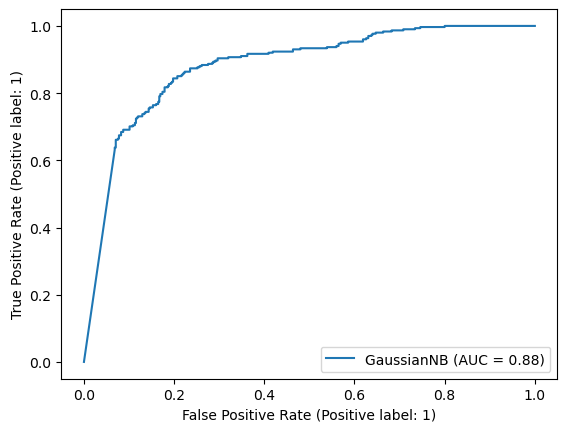

In [323]:
plot_roc_curve(model, X_test_fe, y_test)

#### Precision Recall Curve

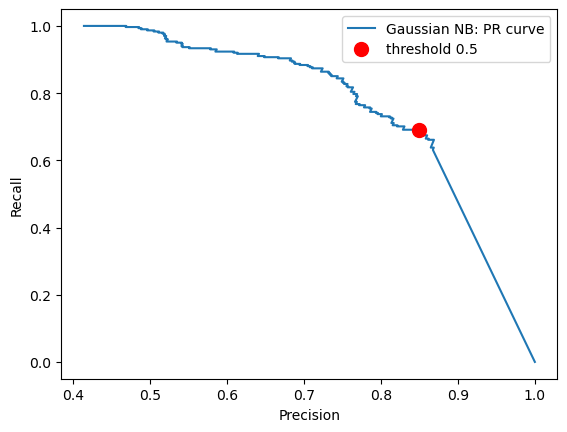

In [351]:
# Adapted from lecture 1 DSCI 573

precision, recall, thresholds = precision_recall_curve(
    y_test, model.predict_proba(X_test_fe)[:, 1]
)

plt.plot(precision, recall, label="Gaussian NB: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, model.predict(X_test_fe)),
    recall_score(y_test, model.predict(X_test_fe)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

#### Custom function for prediction with different threshold

In [408]:
def predict_with_custom_threshold(mdl, X_te, thr):
    """
    Returns the binary prediction array from fitted ML model
    mdl, applied to input X_test and specified threshold 
    ----------
    model :
    scikit-learn model
    mdl : model like GaussianNB() fitted on train data 
    X_te : Test data to make predictions upon
    thr: Custom threshold, above which predictions are to
    be classified as True or 1
    Returns
    ----------
    numpy array with the bianry predictions
    """
    
    prob_pred = mdl.predict_proba(X_te)[:, 1]
    pred = np.array([1 if value > thr else 0 for value in prob_pred])

    return pred

In [413]:
# Trying on Test data

In [414]:
custom_threshold = 0.00000000001

In [415]:
recall_score(y_test, predict_with_custom_threshold(model, X_test_fe, custom_threshold))

0.7740863787375415

In [416]:
precision_score(y_test, predict_with_custom_threshold(model, X_test_fe, custom_threshold))

0.768976897689769

In [417]:
# Trying it on the train data

In [418]:
recall_score(y_train, predict_with_custom_threshold(model, X_train_fe, custom_threshold))

0.8142857142857143

In [419]:
precision_score(y_train, predict_with_custom_threshold(model, X_train_fe, custom_threshold))

0.7835051546391752